# Peer review assignment 2

***

## Project Description

This week, you will be using the results of last week’s analysis to come up with some hypotheses. You will be answering questions such as: Who are the ideal customers that should be targeted? How should they be approached to maximize the sales of the client’s new home security systems?  Using the data, figure out the attributes of the customer who wants to install an advanced, hi-tech security system and the attributes of a person who would switch security system brands.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Segments| Customer Segments	|
| Quality| Buy Based on Quality- Not Price- Agree 	|
| TryNewTechnology|	I am Among First of my Friends to try new Technology Products- Agree|
| PayMore | I am Willing to Pay More for Top Quality Electronics- Agree 	|
| ProductsLatestTechnology|	Prefer Products With the Latest Technology- Agree |
| Price | Price Is More Important than Brand Names- Agree 	|
| SwitchBrands|	Will Switch Brands to Use a Cents-Off Coupon- Agree |
| BuySecurityDevices|	Would like to buy Security Devices|
| Total| Summation	|

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("security.csv")

In [3]:
df

,Segments,Quality,TryNewTechnology,PayMore,ProductsLatestTechnology,Price,SwitchBrands,BuySecurityDevices,Total
0,Comfortable Retirees,1094782,287818,537362,726376,1240547,759639,121346,4767870
1,Diverse Workers,2784539,1201534,1920240,2082794,3308650,2286425,327728,13911910
2,Elder Midscale Class,1709107,403429,1001329,1141297,1787397,1081551,424447,7548557
3,Elite Households,1349997,551943,1153657,1022352,1377813,887918,773110,7116790
4,Mass Markets,2792014,1296515,2239097,2229801,3152588,2168742,807344,14686101
5,Modest Families,1108450,610257,867047,932759,1332094,1076186,224353,6151146
6,Prosperous Acheivers,1345702,411378,953399,894410,1234963,704491,849727,6394070
7,Upscale Matures,1068362,285041,647027,667994,1015715,596014,451118,4731271
8,Well-heeled Affluents,933276,343055,756944,673420,874881,522831,1176191,5280598
9,Young Affluent Mobiles,1901962,888932,1685141,1583489,1882546,1345477,427550,9715097


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Segments                  12 non-null     object
 1   Quality                   12 non-null     int64 
 2   TryNewTechnology          12 non-null     int64 
 3   PayMore                   12 non-null     int64 
 4   ProductsLatestTechnology  12 non-null     int64 
 5   Price                     12 non-null     int64 
 6   SwitchBrands              12 non-null     int64 
 7   BuySecurityDevices        12 non-null     int64 
 8   Total                     12 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 992.0+ bytes


In [5]:
df.describe()

,Quality,TryNewTechnology,PayMore,ProductsLatestTechnology,Price,SwitchBrands,BuySecurityDevices,Total
count,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00
mean,1698258.92,679486.75,1269576.17,1274081.67,1818377.92,1215720.92,507197.58,8462699.92
std,658451.82,361399.70,564765.40,551228.35,804733.75,590675.12,324795.86,3428638.39
min,933276.00,285041.00,537362.00,667994.00,874881.00,522831.00,121346.00,4731271.00
25%,1105033.00,388335.50,839521.25,852401.50,1239151.00,745852.00,301884.25,5933509.00
50%,1529552.00,581100.00,1077493.00,1081824.50,1582605.00,1078868.50,425998.50,7332673.50
75%,2107305.50,923062.75,1721101.75,1659510.50,2293868.25,1526064.75,781668.50,10615782.75
max,2792014.00,1296515.00,2239097.00,2229801.00,3308650.00,2286425.00,1176191.00,14686101.00


In [6]:
df.columns

Index(['Segments', 'Quality', 'TryNewTechnology', 'PayMore', 'ProductsLatestTechnology', 'Price', 'SwitchBrands', 'BuySecurityDevices', 'Total'], dtype='object')

In [7]:
df[["Segments","Quality"]].sort_values(by="Quality", ascending=False).head()

,Segments,Quality
4,Mass Markets,2792014
1,Diverse Workers,2784539
10,Young Upscale Families,2221763
11,Young Urban Masses,2069153
9,Young Affluent Mobiles,1901962


In [8]:
df[["Segments","TryNewTechnology"]].sort_values(by="TryNewTechnology", ascending=False).head()

,Segments,TryNewTechnology
4,Mass Markets,1296515
1,Diverse Workers,1201534
11,Young Urban Masses,1025455
9,Young Affluent Mobiles,888932
10,Young Upscale Families,848484


In [9]:
df[["Segments","PayMore"]].sort_values(by="PayMore", ascending=False).head()

,Segments,PayMore
4,Mass Markets,2239097
1,Diverse Workers,1920240
10,Young Upscale Families,1768303
11,Young Urban Masses,1705368
9,Young Affluent Mobiles,1685141


In [10]:
df[["Segments","ProductsLatestTechnology"]].sort_values(by="ProductsLatestTechnology", ascending=False).head()

,Segments,ProductsLatestTechnology
4,Mass Markets,2229801
1,Diverse Workers,2082794
10,Young Upscale Families,1682411
11,Young Urban Masses,1651877
9,Young Affluent Mobiles,1583489


In [11]:
df[["Segments","Price"]].sort_values(by="Price", ascending=False).head()

,Segments,Price
1,Diverse Workers,3308650
4,Mass Markets,3152588
11,Young Urban Masses,2332275
10,Young Upscale Families,2281066
9,Young Affluent Mobiles,1882546


In [12]:
df[["Segments","SwitchBrands"]].sort_values(by="SwitchBrands", ascending=False).head()

,Segments,SwitchBrands
1,Diverse Workers,2286425
4,Mass Markets,2168742
11,Young Urban Masses,1686936
10,Young Upscale Families,1472441
9,Young Affluent Mobiles,1345477


In [13]:
df[["Segments","BuySecurityDevices"]].sort_values(by="BuySecurityDevices", ascending=False).head()

,Segments,BuySecurityDevices
8,Well-heeled Affluents,1176191
6,Prosperous Acheivers,849727
4,Mass Markets,807344
3,Elite Households,773110
7,Upscale Matures,451118


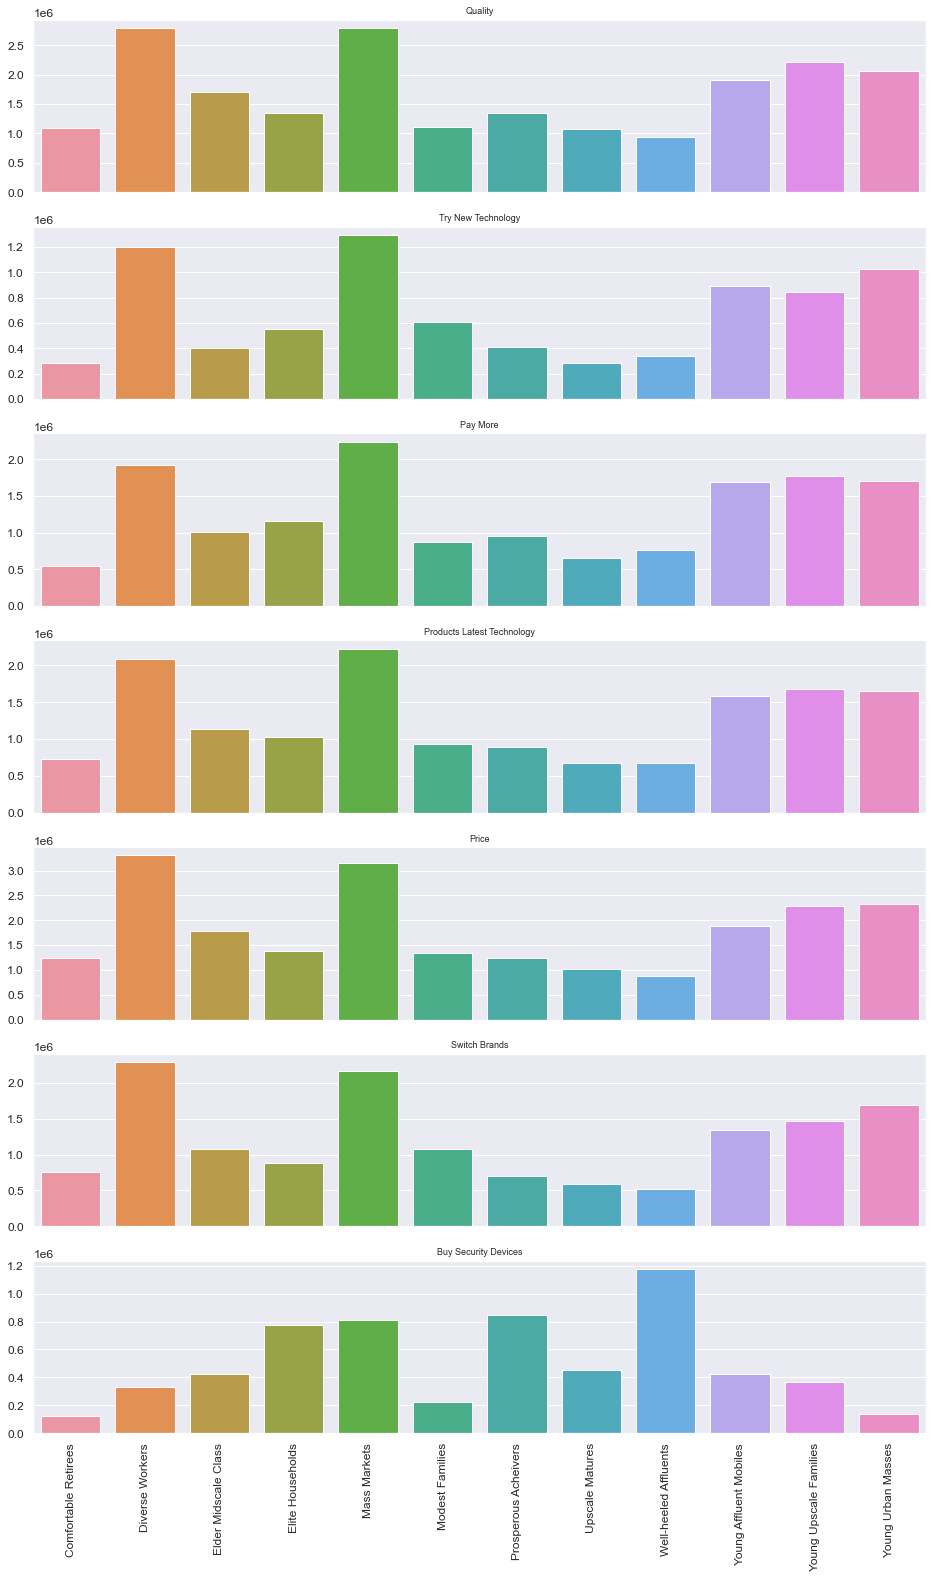

In [14]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(7,1, sharex=True, figsize=(16,26))
#fig.suptitle('Main Title')


sns.barplot(x="Segments", y="Quality", data=df, ax=ax[0])
ax[0].set_title('Quality')
ax[0].tick_params('x', labelrotation=90)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.barplot(x="Segments", y="TryNewTechnology", data=df, ax=ax[1])
ax[1].set_title('Try New Technology')
ax[1].tick_params('x', labelrotation=90)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

sns.barplot(x="Segments", y="PayMore", data=df, ax=ax[2])
ax[2].set_title('Pay More')
ax[2].tick_params('x', labelrotation=90)
ax[2].set_xlabel("")
ax[2].set_ylabel("")

sns.barplot(x="Segments", y="ProductsLatestTechnology", data=df, ax=ax[3])
ax[3].set_title('Products Latest Technology')
ax[3].tick_params('x', labelrotation=90)
ax[3].set_xlabel("")
ax[3].set_ylabel("")

sns.barplot(x="Segments", y="Price", data=df, ax=ax[4])
ax[4].set_title('Price')
ax[4].tick_params('x', labelrotation=90)
ax[4].set_xlabel("")
ax[4].set_ylabel("")

sns.barplot(x="Segments", y="SwitchBrands", data=df, ax=ax[5])
ax[5].set_title('Switch Brands')
ax[5].tick_params('x', labelrotation=90)
ax[5].set_xlabel("")
ax[5].set_ylabel("")

sns.barplot(x="Segments", y="BuySecurityDevices", data=df, ax=ax[6])
ax[6].set_title('Buy Security Devices')
ax[6].tick_params('x', labelrotation=90)
ax[6].set_xlabel("")
ax[6].set_ylabel("")

plt.show()

## Conclusion

From the graphs, we can deduce Diverse Workers, Mass Markets, Young Affluent Mobiles , Young Urban Masses and Young Upscale Families occupies top 5. Even though Well-heeled Affluents wants to buy security devices the most, they will have more choices to choose from.

#### Python code done by Dennis Lam